In [12]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec

sns.set_style('ticks')

In [13]:
run -i data_prep.py

In [14]:
# * Import all the data needed for visualization

capacity_additions = pd.read_pickle('Dat_figures//capacity_additions.pkl')

capacity_outflows = pd.read_pickle('Dat_figures//capacity_outflows.pkl')

material_additions = pd.read_pickle('Dat_figures//material_additions.pkl')

material_outflows = pd.read_pickle('Dat_figures//material_outflows.pkl')

CAPEX = pd.read_pickle('Dat_figures//CAPEX.pkl')

employment = pd.read_pickle('Dat_figures//employment.pkl')

chemistries = pd.read_pickle('Dat_figures//chemistries.pkl')

# Plot chemistries scenario 

## Create colormap

In [15]:
col1 = np.array([169/256, 169/ 256, 169/256, 1])
my_map = LinearSegmentedColormap.from_list('paired',colors=[ col1,'xkcd:dull blue','xkcd:asparagus',
                                                           'xkcd:light orange',
                                                            'xkcd:reddish','xkcd:light eggplant','xkcd:sandy','xkcd:burgundy'], N=8)


## Plot

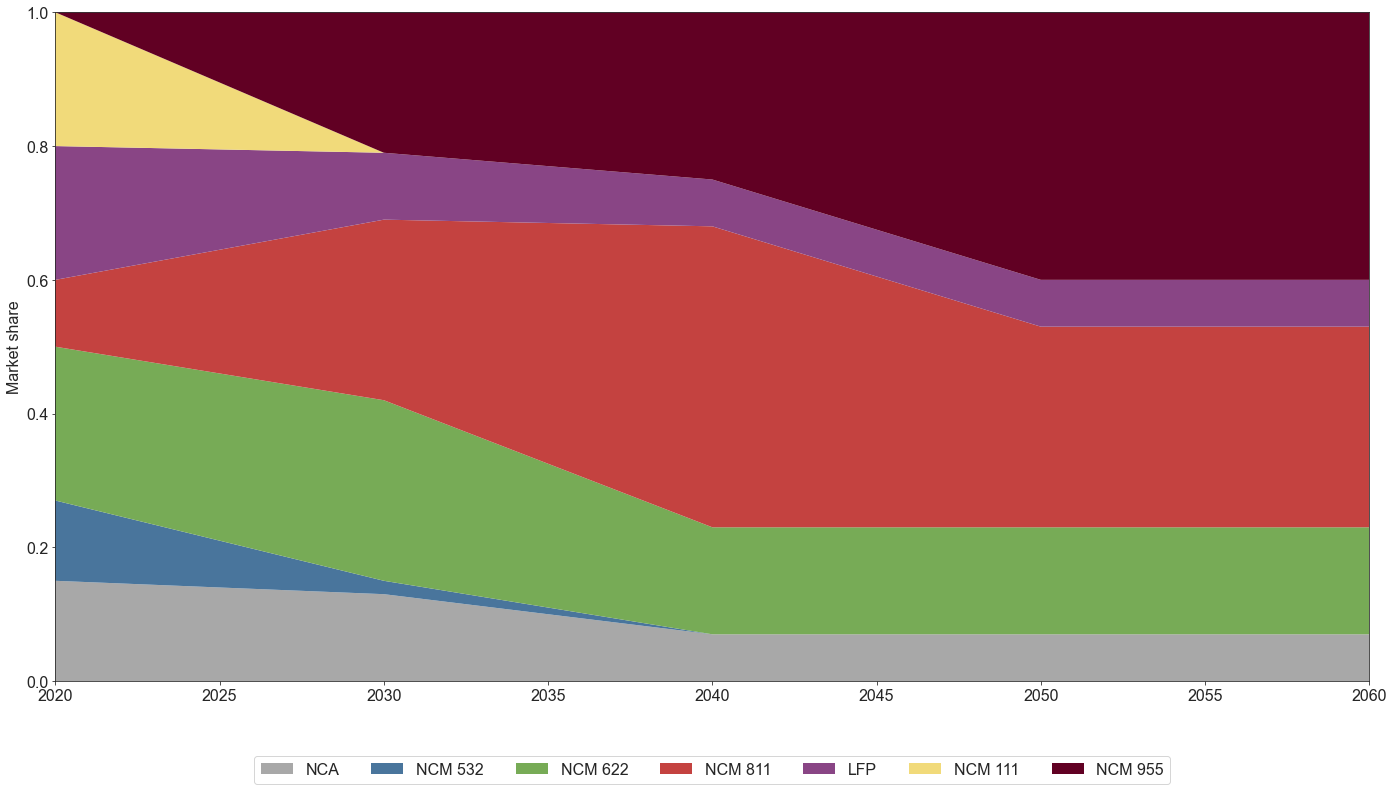

In [17]:
inter = chemistries.copy().transpose()
inter.drop('Li-S', axis = 1, inplace = True)
inter.plot.area(cmap = my_map,figsize =(19.2,11), fontsize = 16, linewidth = 0)
#plt.legend(bbox_to_anchor = (1,1))
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=8, fontsize = 16)

plt.ylim(0,1)
plt.xlim(2020,2060)
plt.tight_layout()
plt.ylabel('Market share', fontsize = 16 )
#plt.savefig('chemistries.jpeg', pad = 5, dpi = 1200)
#plt.savefig('chemistries_lowres.jpeg', dpi = 400, pad_inches = 10)
plt.show()

## Plot survival rate distribution for vehicles entering the stock at year x

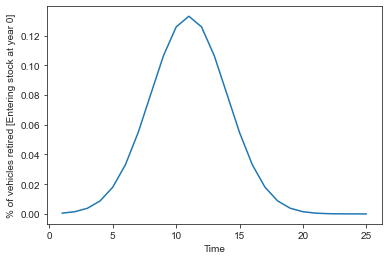

In [19]:
mu = 11
sigma = 3
x = np.linspace(1, 25, 25)
#y = np.linspace(mu-5*sigma, mu+4*sigma, 15)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.ylabel('% of vehicles retired [Entering stock at year 0]')
plt.xlabel('Time')
#plt.savefig('Retirement curves.jpg', dpi = 600)
plt.show()


## Create Dataframe with mining rates of different materials. Data based on USGS 

In [21]:
mining_rate_2019 = pd.DataFrame(data = [0,144000000,0,1100000000,82000000,0,27000000000,0,0])
mining_rate_2019 = mining_rate_2019.transpose()
mining_rate_2019.columns = ['Al','Co','Cu','Graphite','Li','Mn','Ni','Plastics','Steel']

mining_rate_2025 = pd.DataFrame(data = [0,250000000,0,1100000000,155000000,0,27000000000,0,0])
mining_rate_2025 = mining_rate_2025.transpose()
mining_rate_2025.columns = ['Al','Co','Cu','Graphite','Li','Mn','Ni','Plastics','Steel']


,Al,Co,Cu,Graphite,Li,Mn,Ni,Plastics,Steel
0,0.0,0.144,0.0,1.1,0.082,0.0,27.0,0.0,0.0


## Convert capacity flows from kWh to TWh. 
## Convert material flows from kg to Mt (mega-tonnes)

In [26]:
mining_rate_2019 = mining_rate_2019.div(1e9)
mining_rate_2025 = mining_rate_2025.div(1e9)

for i in range(len(material_additions)):
    material_additions[i] = material_additions[i].div(1e9)
    material_outflows[i] = material_outflows[i].div(1e9)
    capacity_additions[i] = capacity_additions[i].div(1e9)
    capacity_outflows[i] = capacity_outflows[i].div(1e9)


# Plot Cobalt, Lithium and Graphite flows 

NameError: name 'material_add_tot_base_SSP2' is not defined

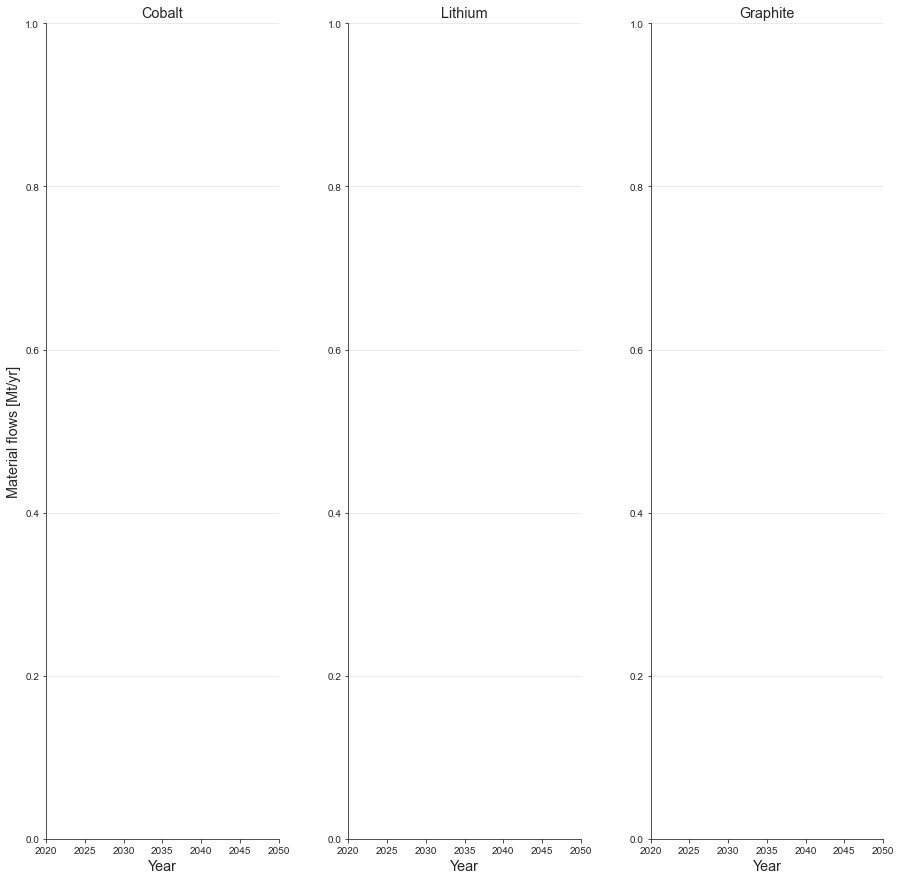

In [28]:
col_background = ['#d8dcd6']

#Colors in the following order:  RCP2.6 SSP2 - RCP2.6 SSP1 - RCP2-6 LED - base SSP2 - base SSP1 - base LED # 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))



fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_title('Cobalt', size = 'x-large')
ax[1].set_title('Lithium', size = 'x-large')
ax[2].set_title('Graphite', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[1].set_xlim(2020,2050)
ax[2].set_xlim(2020,2050)


ax[0].yaxis.grid(color = 'black', alpha = 0.1)
ax[1].yaxis.grid(color = 'black', alpha = 0.1)
ax[2].yaxis.grid(color = 'black', alpha = 0.1)

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_ylabel('Material flows [Mt/yr]', size = 'x-large')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].set_xlabel('Year', size = 'x-large')
ax[1].set_xlabel('Year', size = 'x-large')
ax[2].set_xlabel('Year', size = 'x-large')


x = material_add_tot_base_SSP2.columns.values
x = np.array(x, dtype = float)

y1 = material_out_tot_base_SSP2.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Co'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Co'].divide(1e9))

ax[0].plot(x,y1, color = linecols[0])
ax[0].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Co'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Co'].divide(1e9))

ax[0].plot(x,y3, color = linecols[2])
ax[0].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Co'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Co'].divide(1e9))

ax[0].plot(x,y5, color = linecols[5])
ax[0].plot(x,y6, color = linecols[4])

## 3

y1 = material_out_tot_base_SSP2.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Li'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Li'].divide(1e9))

ax[1].plot(x,y1, color = linecols[0])
ax[1].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Li'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Li'].divide(1e9))

ax[1].plot(x,y3, color = linecols[2])
ax[1].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Li'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Li'].divide(1e9))

ax[1].plot(x,y5, color = linecols[5])
ax[1].plot(x,y6, color = linecols[4])



## 9
y1 = material_out_tot_base_SSP2.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Graphite'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Graphite'].divide(1e9))

ax[2].plot(x,y1, color = linecols[0])
ax[2].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Graphite'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Graphite'].divide(1e9))

ax[2].plot(x,y3, color = linecols[2])
ax[2].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Graphite'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Graphite'].divide(1e9))

ax[2].plot(x,y5, color = linecols[5])
ax[2].plot(x,y6, color = linecols[4])

### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 3, markerscale = 2)
gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

gridlines = ax[1].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)
gridlines = ax[2].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

#plt.savefig('potential_recovery.jpg', dpi = 400, bbox_inches = 'tight')

In [ ]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))



fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_title('Cobalt', size = 'x-large')
ax[1].set_title('Lithium', size = 'x-large')
ax[2].set_title('Graphite', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[1].set_xlim(2020,2050)
ax[2].set_xlim(2020,2050)

ax[0].set_ylim(-1,1.5)
ax[1].set_ylim(-1,1.5)
ax[2].set_ylim(-10,15)

ax[0].yaxis.grid(color = 'black', alpha = 0.1)
ax[1].yaxis.grid(color = 'black', alpha = 0.1)
ax[2].yaxis.grid(color = 'black', alpha = 0.1)


ax[0].set_ylabel('Material additions to stock vs. material removals from stock [Mt/yr]', size = 'x-large')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].set_xlabel('Year', size = 'x-large')
ax[1].set_xlabel('Year', size = 'x-large')
ax[2].set_xlabel('Year', size = 'x-large')


x = material_add_tot_base_SSP2.columns.values
x = np.array(x, dtype = float)

y1 = material_add_tot_base_SSP2.loc['Co'].divide(1e9)
y2 = material_add_tot_base_SSP1.loc['Co'].divide(1e9)

ax[0].plot(x,y1, color = linecols[0])
ax[0].plot(x,y2, color = linecols[1])

y3 = material_add_tot_RCP26_SSP2.loc['Co'].divide(1e9)
y4 = material_add_tot_RCP26_SSP1.loc['Co'].divide(1e9)

ax[0].scatter(2020,mining_rate_2019['Co'].divide(1e9), color = 'black', s = 100)
ax[0].scatter(2025,mining_rate_2025['Co'].divide(1e9), color = 'blue', s = 100)

ax[0].plot(x,y3, color = linecols[2])
ax[0].plot(x,y4, color = linecols[3])

y5 = material_add_tot_RCP26_LED.loc['Co'].divide(1e9)
y6 = material_add_tot_base_LED.loc['Co'].divide(1e9)

ax[0].plot(x,y5, color = linecols[5])
ax[0].plot(x,y6, color = linecols[4])

ax[0].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[0].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)


### Negative flows 


y1 = material_out_tot_base_SSP2.loc['Co'].divide(1e9)[:46]
y2 = material_out_tot_base_SSP1.loc['Co'].divide(1e9)[:46]

ax[0].plot(x,y1, color = linecols[0], linestyle = 'dashed')
ax[0].plot(x,y2, color = linecols[1], linestyle = 'dashed')


y3 = material_out_tot_RCP26_SSP2.loc['Co'].divide(1e9)[:46]
y4 = material_out_tot_RCP26_SSP1.loc['Co'].divide(1e9)[:46]

ax[0].plot(x,y3, color = linecols[2], linestyle = 'dashed')
ax[0].plot(x,y4, color = linecols[3], linestyle = 'dashed')


y5 = material_out_tot_RCP26_LED.loc['Co'].divide(1e9)[:46]
y6 = material_out_tot_base_LED.loc['Co'].divide(1e9)[:46]

ax[0].plot(x,y5, color = linecols[5], linestyle = 'dashed')
ax[0].plot(x,y6, color = linecols[4], linestyle = 'dashed')

ax[0].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[0].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)


## 3

y1 = material_add_tot_base_SSP2.loc['Li'].divide(1e9)
y2 = material_add_tot_base_SSP1.loc['Li'].divide(1e9)

ax[1].plot(x,y1, color = linecols[0])
ax[1].plot(x,y2, color = linecols[1])

y3 = material_add_tot_RCP26_SSP2.loc['Li'].divide(1e9)
y4 = material_add_tot_RCP26_SSP1.loc['Li'].divide(1e9)

ax[1].plot(x,y3, color = linecols[2])
ax[1].plot(x,y4, color = linecols[3])

ax[1].scatter(2020,mining_rate_2019['Li'].divide(1e9), color = 'black', s = 100)
ax[1].scatter(2025,mining_rate_2025['Li'].divide(1e9), color = 'blue', s = 100)

y5 = material_add_tot_RCP26_LED.loc['Li'].divide(1e9)
y6 = material_add_tot_base_LED.loc['Li'].divide(1e9)

ax[1].plot(x,y5, color = linecols[5])
ax[1].plot(x,y6, color = linecols[4])

ax[1].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[1].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)

### Negative flows 


y1 = material_out_tot_base_SSP2.loc['Li'].divide(1e9)[:46]
y2 = material_out_tot_base_SSP1.loc['Li'].divide(1e9)[:46]

ax[1].plot(x,y1, color = linecols[0], linestyle = 'dashed')
ax[1].plot(x,y2, color = linecols[1], linestyle = 'dashed')

y3 = material_out_tot_RCP26_SSP2.loc['Li'].divide(1e9)[:46]
y4 = material_out_tot_RCP26_SSP1.loc['Li'].divide(1e9)[:46]

ax[1].plot(x,y3, color = linecols[2], linestyle = 'dashed')
ax[1].plot(x,y4, color = linecols[3], linestyle = 'dashed')


y5 = material_out_tot_RCP26_LED.loc['Li'].divide(1e9)[:46]
y6 = material_out_tot_base_LED.loc['Li'].divide(1e9)[:46]

ax[1].plot(x,y5, color = linecols[5], linestyle = 'dashed')
ax[1].plot(x,y6, color = linecols[4], linestyle = 'dashed')

ax[1].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[1].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)

## 9
y1 = material_add_tot_base_SSP2.loc['Graphite'].divide(1e9)
y2 = material_add_tot_base_SSP1.loc['Graphite'].divide(1e9)

ax[2].plot(x,y1, color = linecols[0])
ax[2].plot(x,y2, color = linecols[1])


y3 = material_add_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)
y4 = material_add_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)

ax[2].plot(x,y3, color = linecols[2])
ax[2].plot(x,y4, color = linecols[3])

ax[2].scatter(2020,mining_rate_2019['Graphite'].divide(1e9), color = 'black', s = 100)
#ax[2].scatter(2020,mining_rate_2019['Graphite'].divide(1e9).mul(2), color = 'black', s = 100)


y5 = material_add_tot_RCP26_LED.loc['Graphite'].divide(1e9)
y6 = material_add_tot_base_LED.loc['Graphite'].divide(1e9)

ax[2].plot(x,y5, color = linecols[5])
ax[2].plot(x,y6, color = linecols[4])

ax[2].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[2].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)
### Negative flows 


y1 = material_out_tot_base_SSP2.loc['Graphite'].divide(1e9)[:46]
y2 = material_out_tot_base_SSP1.loc['Graphite'].divide(1e9)[:46]

ax[2].plot(x,y1, color = linecols[0], linestyle = 'dashed')
ax[2].plot(x,y2, color = linecols[1], linestyle = 'dashed')


y3 = material_out_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)[:46]
y4 = material_out_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)[:46]

ax[2].plot(x,y3, color = linecols[2], linestyle = 'dashed')
ax[2].plot(x,y4, color = linecols[3], linestyle = 'dashed')


y5 = material_out_tot_RCP26_LED.loc['Graphite'].divide(1e9)[:46]
y6 = material_out_tot_base_LED.loc['Graphite'].divide(1e9)[:46]

ax[2].plot(x,y5, color = linecols[5], linestyle = 'dashed')
ax[2].plot(x,y6, color = linecols[4], linestyle = 'dashed')
ax[2].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[2].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)

### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 3, markerscale = 2)
gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

gridlines = ax[1].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)
gridlines = ax[2].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

#plt.savefig('New figures/flows_new_withmining.jpg', dpi = 600,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(20,20), nrows = 1, ncols=2)

col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']
cols_scat = ['#343837','#735c12','#a2a415','#a57e52']


#customp = sns.set_palette(sns.color_palette(linecols))

x = addcap_total_base_SSP2.columns.values[5:36]
x = np.array(x, dtype = 'float')

ax[0].spines['top'].set_visible(False)

y1 = addcap_total_base_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y2 = addcap_total_base_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y3 = addcap_base_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]

y4 = addcap_total_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y5 = addcap_total_RCP26_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y6 = addcap_RCP26_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]

ax[0].plot(x, y1, color = linecols[0])
ax[0].plot(x, y2, color = linecols[1])

ax[0].plot(x, y3, color = linecols[4])
ax[0].plot(x, y6, color = linecols[5])

ax[0].plot(x, y4, color = linecols[2])
ax[0].plot(x, y5, color = linecols[3])

ax[0].fill_between(x,y1,y3, color = col_background, alpha = .3)
ax[0].fill_between(x,y4,y6, color = col_background, alpha = .3)

#sns.scatterplot(data = prod_capacity.divide(1e3).transpose(), s = 100, ax = ax[0], palette = 'viridis', legend = None)


for i in range(4):
    yscat = prod_capacity.divide(1e3).loc[i]
    xscat1 = prod_capacity.columns.values
    ax[0].scatter(xscat1, yscat, color = cols_scat[i], s = 100)


ax[0].set_ylabel('Capacity flows [TWh/year]', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[0].set_ylim(0,max(addcap_total_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)))

ax2 = ax[0].twinx()
ax2.spines['top'].set_visible(False)
ax2.grid(None)
y1 = matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y2 = matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y3 = matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]

y4 = matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y5 = matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y6 = matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]

ax2.plot(x, y1, color = linecols[0])
ax2.plot(x, y2, color = linecols[1])

ax2.plot(x, y3, color = linecols[4])
ax2.plot(x, y6, color = linecols[5])

ax2.plot(x, y4, color = linecols[2])
ax2.plot(x, y5, color = linecols[3])




#ax2.set_ylabel('Material additions [Mt/year]', size = 'x-large')


ax2.set_ylim(0,max(matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)))
ax2.axes.yaxis.set_ticklabels([])
#ax2.set_yticks([])
x = cap_total_eol_base_SSP2.columns.values[5:46]
x = np.array(x, dtype = 'float')

ax[1].spines['top'].set_visible(False)

y1 = cap_total_eol_base_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y2 = cap_total_eol_base_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y3 = captotal_eol_base_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]

y4 = cap_total_eol_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y5 = cap_total_eol_RCP26_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y6 = captotal_eol_RCP26_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]

ax[1].plot(x, y1, color = linecols[0])
ax[1].plot(x, y2, color = linecols[1])

ax[1].plot(x, y3, color = linecols[4])
ax[1].plot(x, y6, color = linecols[5])

ax[1].plot(x, y4, color = linecols[2])
ax[1].plot(x, y5, color = linecols[3])

ax[1].fill_between(x,y1,y3, color = col_background, alpha = .3)
ax[1].fill_between(x,y4,y6, color = col_background, alpha = .3)

ax[1].set_ylim(0,max(addcap_total_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)))
ax2 = ax[1].twinx()
ax2.spines['top'].set_visible(False)


y1 = matflows_eol_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y2 = matflows_eol_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y3 = matflow_eol_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]

y4 = matflows_eol_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y5 = matflows_eol_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y6 = matflow_eol_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]

ax2.plot(x, y1, color = linecols[0])
ax2.plot(x, y2, color = linecols[1])

ax2.plot(x, y3, color = linecols[4])
ax2.plot(x, y6, color = linecols[5])

ax2.plot(x, y4, color = linecols[2])
ax2.plot(x, y5, color = linecols[3])

ax[1].fill_between([2050,2060],[0,0],[12e9,12e9],facecolor='blue',
                alpha=0.1, hatch='...',edgecolor='w',zorder=1)


#sns.scatterplot(data = eol_capacity.divide(1e6).transpose(), ax = ax2, palette = ['black'])
ax[1].axes.yaxis.set_ticklabels([])
#ax[1].set_yticks([])
ax[0].tick_params(labelsize = 14)
ax[1].tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
ax2.set_ylabel('Total flows of materials (Mt/year)', size = 'x-large')
#ax[1].set_ylabel('Total capacity retired yearly [TWh/year]', size = 'x-large')
ax2.grid(None)

ax2.set_ylim(0,max(matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)))
ax[1].set_xlim(2020,2060)
ax[1].legend_ = None

ax[0].text(2021, 13.5, 'a - Inflows to EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
ax[1].text(2021, 13.5, 'b - Outflows from EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')

######### LEGEND ################

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat1 =  mlines.Line2D([], [], color = cols_scat[0], marker = '.', linestyle = '', label='Benchmark Minerals projection')
scat2 =  mlines.Line2D([], [], color = cols_scat[1], marker = '.', linestyle = '', label='Reuters projection')
scat3 =  mlines.Line2D([], [], color = cols_scat[2], marker = '.', linestyle = '', label='Pillot C. projection')
scat4 =  mlines.Line2D([], [], color = cols_scat[3], marker = '.', linestyle = '', label='Slowik, Lutsey and Hsu projection')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [line3,line4,line5, line1, line2, line6,range_int, scat1,scat2,scat3,scat4]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, .05), borderaxespad=0.1, handletextpad=1., columnspacing=6,fontsize=15, frameon=True, ncol= 4, markerscale = 2)


#plt.tight_layout()
#ax2.set_ylim(0,34.5)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
#plt.savefig('New figures\ew_new_Figure1.jpg', dpi = 600, bbox_inches = 'tight')


In [ ]:
y1 = CAPEX_exp_base_SSP2[1:46]
y2 = CAPEX_exp_base_SSP1[1:46]
y3 = CAPEX_exp_RCP26_SSP2[1:46]
y4 = CAPEX_exp_RCP26_SSP1[1:46]
y5 = CAPEX_exp_base_LED[1:46]
y6 = CAPEX_exp_RCP26_LED[1:46]

x1 = addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x2 = addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x3 = addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x4 = addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x5 = addcap_base_LED.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x6 = addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x1, y1, color = linecols[0])
ax.plot(x2, y2, color = linecols[1])
ax.plot(x3, y3, color = linecols[2])
ax.plot(x4, y4, color = linecols[3])
ax.plot(x5, y5, color = linecols[4])
ax.plot(x6, y6, color = linecols[5])


ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Cumulative installed capacity [TWh]', fontsize = 'x-large')
ax.set_ylabel('CAPEX [Million $/GWh]', fontsize = 'x-large')

ax.legend_= None



line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
#range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
 #                           label='Climate policy scenario range')

lines = [range_int, line3,line4,line5, line1, line2, line6]

fig.legend(handles=lines, loc='center', bbox_to_anchor=(.65, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)

#plt.savefig('New figures/Exp rates.jpg', dpi = 400, bbox_inches = 'tight')

In [ ]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(figsize = (15,10))
#ax.set_title('Cumulative CAPEX', size = 'x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Cumulative CAPEX [Billion $]', size = 'x-large')

ax.set_xlabel('Year', size = 'x-large')
x = addcap_total_base_SSP2.columns.values[5:36]
x = np.array(x, dtype = 'float')

y1 = new_cumulative_CAPEX_RCP26_SSP2[5:36]#.sum(axis = 0)
y2 = new_cumulative_CAPEX_RCP26_SSP1[5:36]#.sum(axis = 0)[5:36]
y3 = new_cumulative_CAPEX_RCP26_LED[5:36]#.sum(axis = 0)[5:36]
y4 = new_cumulative_CAPEX_base_SSP2[5:36]#.sum(axis = 0)[5:36]
y5 = new_cumulative_CAPEX_base_SSP1[5:36]#.sum(axis = 0)[5:36]
y6 = new_cumulative_CAPEX_base_LED[5:36]#.sum(axis = 0)[5:36]

##Cumulative employment
ax.plot(x,y1,color = linecols[2]) 
ax.plot(x,y2, color = linecols[3])
ax.plot(x,y3,color = linecols[5])

ax.plot(x,y4, color = linecols[0]) 
ax.plot(x,y5, color = linecols[1])
ax.plot(x,y6, color = linecols[4])

ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
ax.fill_between(x, y1,y3, color = col_background, alpha = .3)

ax.legend_= None

#ax[0].set_ylim(0,50)
#ax[1].set_ylim(0,800)

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.2, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)

#ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
#ax.fill_between(x, y1,y3, color = col_background, alpha = .3)
ax.set_ylim(0,350)

#plt.savefig('New figures/CAPEX_exprates.jpg', dpi = 400, bbox_inches = 'tight')

In [ ]:
cement_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 2, nrows = 1, usecols = 'CE:DN')
alu_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 3, nrows = 1, usecols = 'CE:DN')
steel_CN_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 4, nrows = 1, usecols = 'CE:DN')

steel_CN_prod.columns = cement_prod.columns.values
alu_prod.columns = cement_prod.columns.values

historical_prod = [cement_prod,alu_prod,steel_CN_prod]

In [ ]:
index_historical = [1990, 1995, 2000, 2005, 2010, 2015]
CAGRs_historical = pd.DataFrame(index = np.arange(len(index_historical)), columns = ['Cement','Aluminium','Steel'])

In [ ]:
PCs_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 5, nrows = 1, usecols = 'CY:DN')
smartphones_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 6, nrows = 1, usecols = 'DF:DN')
solar_PV = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 7, nrows = 1, usecols = 'CY:DN')


In [ ]:
PCs_prod.columns = range(2000,2016)
solar_PV.columns = range(2000,2016)
smartphones_prod.columns = range(2007,2016)

In [ ]:
PbA_EU = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 8, nrows = 1, usecols = 'CY:DN')
PbA_EU.columns = range(2000,2016)

In [ ]:
LIBs_CN = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 9, nrows = 1, usecols = 'CY:DN')
LIBs_CN.columns = range(2000,2016)

In [ ]:
smartphones_prod_list = smartphones_prod.stack().droplevel(0)
solar_PV_list = solar_PV.stack().droplevel(0)
PCs_prod_list = PCs_prod.stack().droplevel(0)
LIBs_CN = LIBs_CN.stack().droplevel(0)
PbA_EU = PbA_EU.stack().droplevel(0)

In [ ]:
materials_addition_all = [matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], 
                          matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], 
                          PCs_prod_list/1e9, smartphones_prod_list/1e9, solar_PV_list/1e9, LIBs_CN/1e9,PbA_EU/1e9]

In [ ]:
historical_segments = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'BEV_data', skiprows = 71, nrows = 7, usecols = 'Q:V')
historical_sales = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Historical EVs sales', skiprows = 13, nrows = 2, usecols = 'L:Q')
#batt_size_PHEV = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'BEV_data', skiprows=20, nrows = 7, usecols = 'B:C')
#batt_size_PHEV = batt_size_PHEV.set_index("Segment")

In [ ]:
batt_size_PHEV = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'BEV_data', skiprows=20, nrows = 7, usecols = 'C')


In [ ]:
BEV_sales_historical = pd.DataFrame(historical_sales.loc[0,:])
PHEV_sales_historical = pd.DataFrame(historical_sales.loc[1,:])

In [ ]:
BEV_sales_historical = BEV_sales_historical.transpose()
PHEV_sales_historical = PHEV_sales_historical.transpose()

In [ ]:
historical_segments.columns = BEV_sales_historical.columns.values

In [ ]:
historical_sales_segmented = [BEV_sales_historical.round(), PHEV_sales_historical.round()]
historical_segments = historical_segments.round(decimals=3)

for i in range(2):
    historical_sales_segmented[i] = pd.concat([historical_sales_segmented[i]]*len(historical_segments.index))
    historical_sales_segmented[i] = historical_sales_segmented[i].set_index(historical_segments.index)
    historical_sales_segmented[i] = historical_sales_segmented[i].mul(historical_segments)
    historical_sales_segmented[i] = historical_sales_segmented[i].round()

In [ ]:
chem_cut = chemistries.loc[:,chemistries.columns.isin(range(2015,2021))]
chem_cut = chem_cut.round(decimals = 3)
for i in range(len(historical_sales_segmented)):
    historical_sales_segmented[i] = historical_sales_segmented[i].reindex(ind, level = 0)
    historical_sales_segmented[i] = historical_sales_segmented[i].mul(chem_cut, level = 1)
    historical_sales_segmented[i] = historical_sales_segmented[i].round()

In [ ]:
historical_capacity = historical_sales_segmented
materials_loading_historical = rep.loc[:,rep.columns.isin(range(2015,2021))]

In [ ]:
batt_size_PHEV = pd.concat([batt_size_PHEV]*(len(historical_segments.columns)), axis = 1)
batt_size_PHEV.columns = [2015,2016,2017,2018,2019,2020]

In [ ]:
mean_historical = mean_batt.loc[:, mean_batt.columns.isin(range(2015,2021))]
historical_capacity[0] = historical_sales_segmented[0].mul(mean_historical, level = 0)
historical_capacity[1] = historical_sales_segmented[1].mul(batt_size_PHEV, level = 0)

In [ ]:
historical_materials = historical_capacity
for i in range(len(historical_materials)):
    historical_materials[i] = historical_materials[i].reindex(new)
    historical_materials[i] = historical_materials[i].mul(materials_loading_historical, level = 2)


In [ ]:
all_materials_historical = historical_materials[0]+historical_materials[1]
capacity_historical = historical_capacity[0]+historical_capacity[1] 

In [ ]:
materials_addition_all.append(all_materials_historical.sum(axis = 0).div(1e9))

In [ ]:
scenarios_2015_2020 = [matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], 
                          matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6]]

In [ ]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    if i <= 5:
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i])
        y = scenarios_2015_2020[i]
        x = scenarios_2015_2020[i].index
        ax.plot(x,y, color = linecols[i], linestyle = ('--'))
    elif i> 5 and i <= 10: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linestyle=('-.'))
    else: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linewidth = 3)

#plt.annotate("I HAVE NO IDEA WHAT I AM DOING?!", xy=(2040,0.001))
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[0], y2 = scenarios_2015_2020[2],color = col_background, alpha = .3)
ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[3], y2 = scenarios_2015_2020[5],color = col_background, alpha = .3)


ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
#ax.set_xlim(1e-1,1e2)
##### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical', linewidth = 3)
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers', linestyle = ('-.'))
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones', linestyle = ('-.'))
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels', linestyle = ('-.'))
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China', linestyle = ('-.'))
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU', linestyle = ('-.'))

#handles_BEV2 = [baseline_marker]
lines = [line1,line2,line3,line4, line5,line6,line12,line7,line8,line9,line10,line11]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/Reference techs_mat demand over time_LIBs EVs historical.jpg', bbox_inches = 'tight', dpi = 600)

In [ ]:
new = []
for df in materials_addition_all:
    new.append(df.pct_change())